In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

In [32]:
#Merging all files into one

from os import listdir
from os.path import isfile, join

all_month_data = pd.DataFrame()

files = [f for f in listdir("./Sales_Data")]

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data, df])

all_month_data.to_csv("all_data.csv", index=False)

In [33]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [34]:
df = all_data.copy()
df.dtypes
df["Month"] = df["Order Date"].str[0:2]
df.dropna(how="all", inplace=True)
df = df.loc[df["Month"] != "Or"]
df["Month"] = pd.to_numeric(df["Month"], errors='coerce')
df["Month"].head()


0    4
2    4
3    4
4    4
5    4
Name: Month, dtype: int64

In [35]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

Text(0.5, 1.0, 'Sales Per Month')

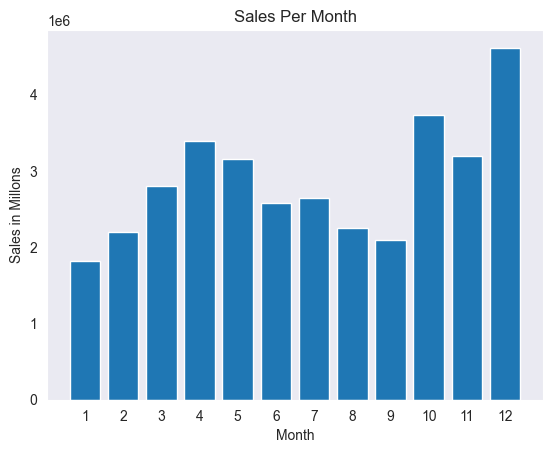

In [36]:

ax = df.groupby(by="Month").sum()

plt.bar(range(1,13), ax["Sales"])
plt.xlabel("Month")
plt.ylabel("Sales in Millons")
plt.xticks(range(1,13))
plt.title("Sales Per Month")


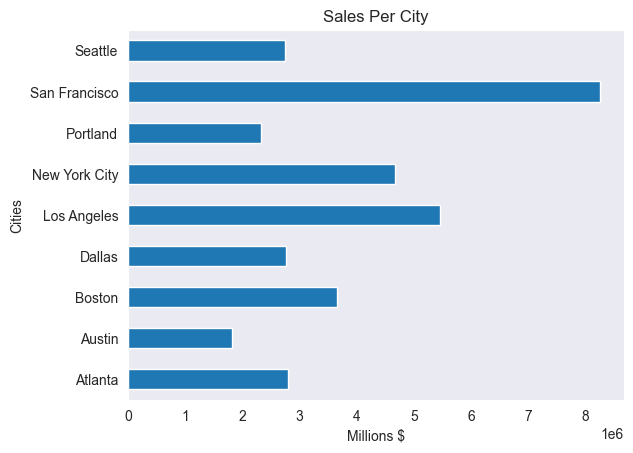

In [37]:
#What US city had the Highest number of sales

df["Sales"] = pd.to_numeric(df["Sales"], errors='coerce')
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1].strip())
ax = df.groupby(by="City").sum()["Sales"].plot(kind="barh")
ax.set_title("Sales Per City")
ax.set_xlabel("Millions $")
ax.set_ylabel("Cities")
plt.show()


In [38]:
df["Hour"] = pd.to_datetime(df["Order Date"]).dt.hour
df["Minutes"] = pd.to_datetime(df["Order Date"]).dt.minute

C:\Users\juani\AppData\Local\Temp\ipykernel_3172\1359567777.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Order Date"]).dt.hour
C:\Users\juani\AppData\Local\Temp\ipykernel_3172\1359567777.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Minutes"] = pd.to_datetime(df["Order Date"]).dt.minute


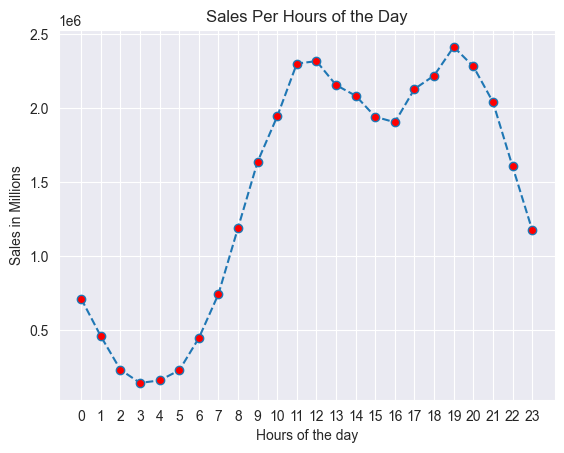

In [39]:
# At what hour is better to set a publicity Campaign?
df["Sales"] = pd.to_numeric(df["Sales"], errors='coerce')
ax = df.groupby(by="Hour").sum()["Sales"].plot(kind="line", linestyle="--", marker="o", markerfacecolor="red")
ax.set_ylabel("Sales in Millions")
ax.set_xlabel("Hours of the day")
ax.set_title("Sales Per Hours of the Day")
ax.grid()
ax.set_xticks(df["Hour"].unique())
ax.set_xticklabels(df["Hour"].unique())
plt.show()